# Figures from book chapter

## Two from earlier investigation

In [1]:
import os
import pandas as pd
from corpkit import *
%matplotlib inline
r = load_all_results()

14:38:20: adj_modifiers.p loaded as adj_modifiers.
14:38:20: adj_riskwords.p loaded as adj_riskwords.
14:38:20: all_govs.p loaded as all_govs.
14:38:20: allwords.p loaded as allwords.
14:38:20: at_risk_things.p loaded as at_risk_things.
14:38:20: baseline.p loaded as baseline.
14:38:22: coll_govs_of_riskwords.p loaded as coll_govs_of_riskwords.
14:38:24: coll_govs_with_pos.p loaded as coll_govs_with_pos.
14:38:27: collapsed_deps.p loaded as collapsed_deps.
14:38:27: edited_adj_riskwords.p loaded as edited_adj_riskwords.
14:38:27: health-part.p loaded as health-part.
14:38:27: health-processes.p loaded as health-processes.
14:38:28: health-social-actors-w-risk-in-sent.p loaded as health-social-actors-w-risk-in-sent.
14:38:29: health_kwds.p loaded as health_kwds.
14:38:33: health_kwds_compared_to_nyt.p loaded as health_kwds_compared_to_nyt.
14:38:33: health_ngrams.p loaded as health_ngrams.
14:38:33: kwds.p loaded as kwds.
14:38:33: modals.p loaded as modals.
14:38:33: modals_lemmatised.

In [40]:
first_fig = pd.read_csv('1900-2000-comparison.csv', index_col = 0)
first_fig

,1900,2000
,,
economics,17.7,22.0
politics,21.1,20.8
health,1.0,13.4
medicine,0.0,3.2
sport,11.5,7.8
...,...,...
military,4.3,1.5
social order,3.3,0.2
technology,0.0,5.4



23:49:36: images/domains_june_final.png created.


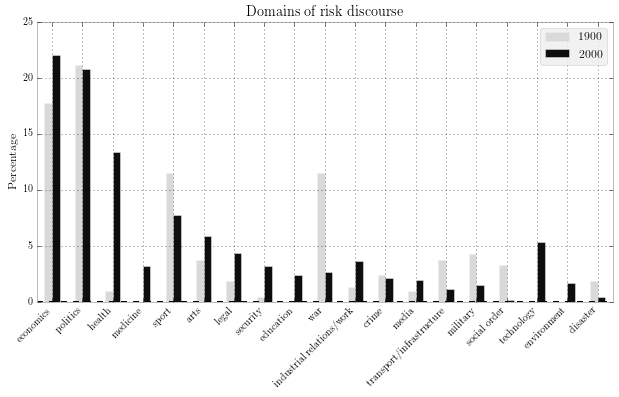

In [138]:
plotter('Domains of risk discourse', first_fig, kind = 'bar', num_to_plot = 'all', x_label = False,
        black_and_white = True, figsize = (10,6), style = 'bmh', show_totals = 'plot', save = 'domains_june_final')

In [54]:
import os
import pandas as pd
second_fig = pd.read_csv('key-terms-comparison.csv', index_col = 0)
second_fig = second_fig[['danger', 'threat', 'risk', 'disaster', 'harm', 'uncertainty']]
#from corpkit import plotter
%matplotlib inline


23:00:28: images/risk_related_june_final.png created.


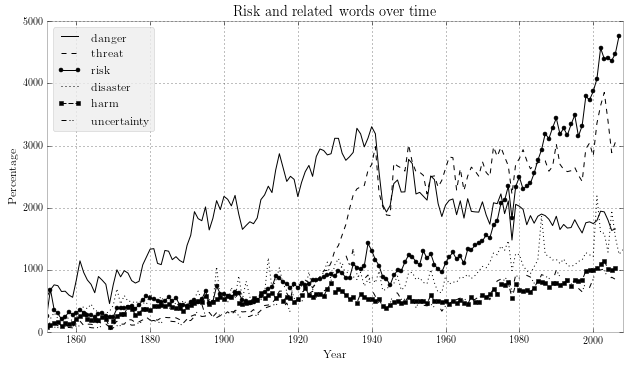

In [92]:
plotter('Risk and related words over time', second_fig, num_to_plot = 'all', 
        black_and_white = True, figsize = (10, 6), style = 'bmh', save = 'risk_related_june_final')


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***


23:48:41: images/risk_by_class_final.png created.


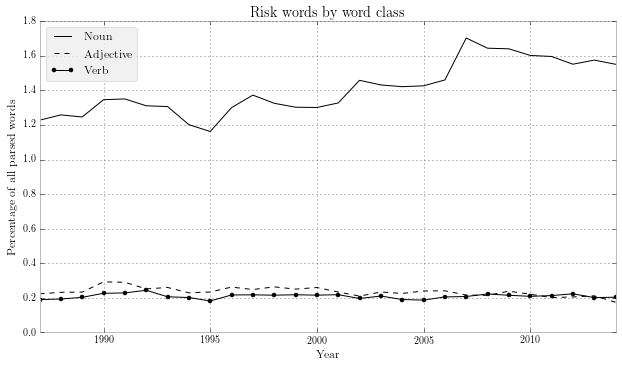

In [136]:
pos = editor(r['riskpos'].results, '%', r['allwords'].totals, skip_subcorpora = 1963)
plotter('Risk words by word class', pos.results , style = 'bmh', num_to_plot = 3,
        figsize = (10, 6), black_and_white = True, save = 'risk_by_class_final', 
        y_label = 'Percentage of all parsed words')

In [57]:
open_words = ['Noun', 'Verb', 'Adjective', 'Adverb']
maths_done = editor(r['riskpos'].results, '%', r['baseline'].results, sort_by = 'total', just_entries = open_words, skip_subcorpora = [1963])


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 4 entries:
    Noun
    Verb
    Adjective
    Adverb

***Done!***




23:25:31: images/perc_open_final.png created.


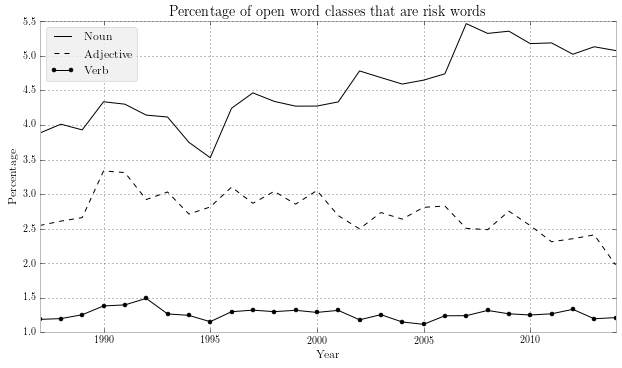


23:25:34: images/perc_open_area_final.png created.


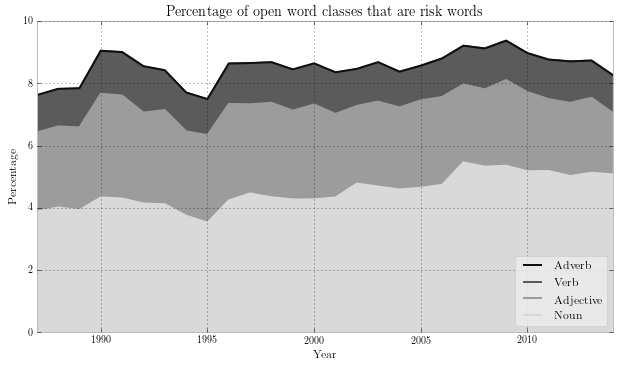

In [113]:
plotter('Percentage of open word classes that are risk words', maths_done.results, black_and_white = True,
        y_label = 'Percentage', figsize = (10, 6), style = 'bmh', num_to_plot = 3, save = 'perc_open_final')
plotter('Percentage of open word classes that are risk words', maths_done.results, 
        y_label = 'Percentage', kind = 'area', legend_pos = 'lower right',
        stacked = True, style = 'bmh', black_and_white = True, figsize = (10, 6), save = 'perc_open_area_final')


***Processing results***

***Done!***


23:02:37: images/ppm_final.png created.


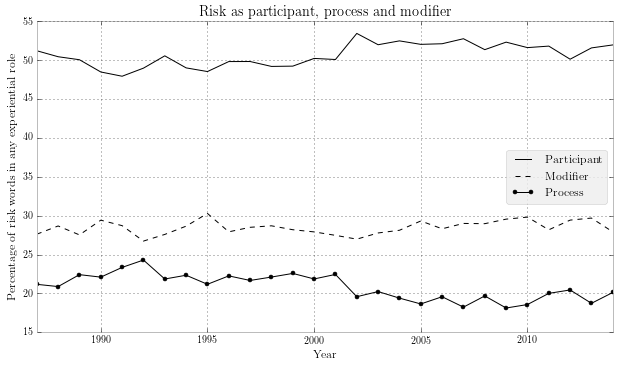

In [96]:
ppm = editor(r['risk_as_part_process_mod'].results, '%', r['risk_as_part_process_mod'].totals)
plotter('Risk as participant, process and modifier', ppm.results.drop('1963'), 
        style = 'bmh', black_and_white = True, figsize = (10, 6), save = 'ppm_final',
        y_label = 'Percentage of risk words in any experiential role')


***Processing results***

Merging 4 entries as "Process":
    dobj:take
    root:root
    dobj:pose
    dobj:run

***Done!***


***Processing results***

Merging 4060 entries as "Participant":
    nsubj:be
    dobj:reduce
    dobj:increase
    dobj:have
    dobj:carry
    dobj:face
    dobj:raise
    dobj:minimize
    dobj:assess
    dobj:create
... and 4050 more ... 

***Done!***


***Processing results***

Merging 5633 entries as "Modifier":
    pobj:at
    pobj:of
    pobj:about
    pobj:with
    pobj:to
    nn:factor
    pobj:for
    pobj:on
    pobj:in
    pobj:as
... and 5623 more ... 

***Done!***


***Processing results***

Keeping 3 entries:
    Participant
    Process
    Modifier

***Done!***


12:04:47: images/ppmfinal.png created.


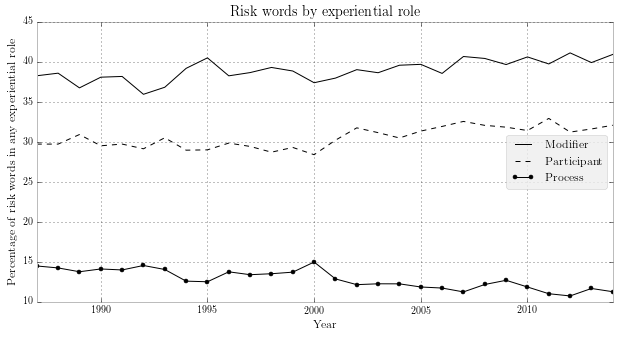

In [143]:
govs = r['all_govs']
ppm = r['risk_as_part_process_mod']
new_govs = editor(govs.results, merge_entries = r'^(root:root|dobj:(take|run|pose))$', newname = 'Process')
new_govs = editor(new_govs.results, merge_entries = r'^(dobj|nsubj|nsubjpass|csubj|acomp|iobj|csubjpass):', newname = 'Participant')
new_govs = editor(new_govs.results, merge_entries = r'^(pobj|nn|amod|rcmod|vmod|tmod|npadvmod|advmod):', newname = 'Modifier')
new_govs = editor(new_govs.results, '%', govs.totals, sort_by = 'total', just_entries = ['Participant', 'Process', 'Modifier'])
plotter('Risk words by experiential role', new_govs.results.drop('1963'), 
        style = 'bmh', figsize = (10, 6), black_and_white = True, y_label = 'Percentage of risk words in any experiential role', save = 'ppmfinal')

## using collapsed dependencies

In [ ]:
#coll_govs_with_pos = interrogator(corpus, 'g', r'(?i)\brisk', lemmatise = True, dep_type = 'collapsed', 
    # add_pos_to_g_d_option=True, quicksave = 'coll_govs_with_pos')
r = load_all_results()
    govs = r['collapsed_govs_with_pos']
exp_roles = [('Process', r'(?i)^(root:root|dobj:.*?:(run|take|pose)|prep_at:v[a-z]*:put|rcmod:.*|xcomp:.*)$'),
            ('Participant', r'(?i)^(xsubj|nsubj|nsubjpass|acomp|agent|appos|cop|dobj|iobj):.*$'),
            ('Modifier', r'(?i)^((advmod|vmod|amod|nn):.*$|(prep_[a-z]*:n|prep_[a-z]*:v))')]
for name, regex in exp_roles:
    govs = editor(govs.results, merge_entries = regex, newname = name)
govs = editor(govs.results, '%', govs.totals, skip_subcorpora = 1963)
plotter('Experiential role', govs.results, y_label = 'Percentage of risk words in any experiential role',
    style = 'bmh', figsize = (10, 6), black_and_white = True)

In [ ]:
# currently problematic
plotter('Risk as experiential subject\slash object', govs.results, style = 'bmh', 
        black_and_white = True, figsize = (10, 6))

### Adjectival modifiers of risk


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 4 entries:
    high
    calculated
    great
    potential

***Done!***


23:52:14: images/sel_adjs_final.png created.


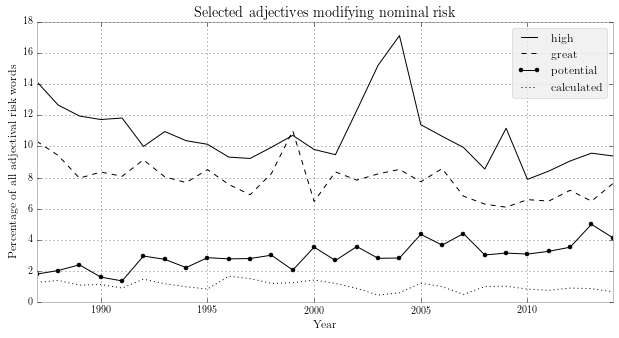

In [139]:
adjmods = editor(r['adj_modifiers'].results, '%', r['adj_modifiers'].totals, 
                 just_entries = ['high', 'calculated', 'great', 'potential'], skip_subcorpora = 1963)
plotter('Selected adjectives modifying nominal risk', adjmods.results, style = 'bmh', 
        black_and_white = True, figsize = (10, 6), save = 'sel_adjs_final', y_label = 'Percentage of all adjectival risk words')

### risk processes

In [62]:
def load_result(savename, loaddir = 'data/saved_interrogations'):
    """Reloads a save_result as namedtuple"""
    import collections
    import pickle
    import os
    import pandas
    if not savename.endswith('.p'):
        savename = savename + '.p'
    unpickled = pickle.load(open(os.path.join(loaddir, savename), 'rb'))
    
    if type(unpickled) == pandas.core.frame.DataFrame or type(unpickled) == pandas.core.series.Series:
        output = unpickled
    elif len(unpickled) == 4:
        outputnames = collections.namedtuple('interrogation', ['query', 'results', 'totals', 'table'])
        output = outputnames(unpickled[0], unpickled[1], unpickled[2], unpickled[3])        
    elif len(unpickled) == 3:
        outputnames = collections.namedtuple('interrogation', ['query', 'results', 'totals'])
        output = outputnames(unpickled[0], unpickled[1], unpickled[2])
    elif len(unpickled) == 2:
        outputnames = collections.namedtuple('interrogation', ['query', 'totals'])
        output = outputnames(unpickled[0], unpickled[1])
    return output

processes = load_result('processes')
proc_rel = editor(processes.results, '%', processes.totals, skip_subcorpora = 1963)


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***




23:26:55: images/risk_proc_final.png created.


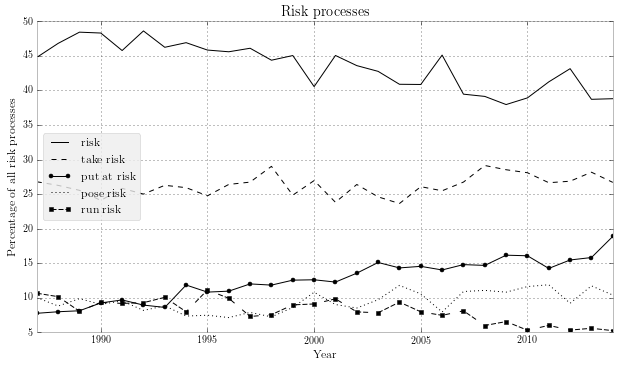

In [116]:
plotter('Risk processes', proc_rel.results, style = 'bmh', legend_pos = 'center left', save = 'risk_proc_final',
        black_and_white=True, figsize = (10, 6), y_label = 'Percentage of all risk processes')


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***


23:26:45: images/mod_types_final.png created.


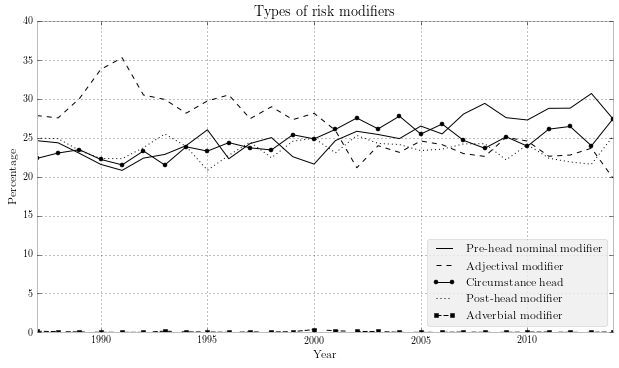

In [115]:
modifiers = r['modifiers']
mods = editor(modifiers.results, '%', modifiers.totals, skip_subcorpora = [1963])
plotter('Types of risk modifiers', mods.results, style = 'bmh', black_and_white = True, 
        figsize = (10, 6), legend_pos = 'lower right', save = 'mod_types_final')

In [203]:
subj_of_risk_process = r['subj_of_risk_process']
noun_lemmata = r['noun_lemmata']

In [204]:
rskrs = editor(subj_of_risk_process.results, '%', subj_of_risk_process.totals, 
               just_totals = True, skip_subcorpora = 1963, sort_by = 'total')


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***




14:30:03: images/riskers_total_final.png created.


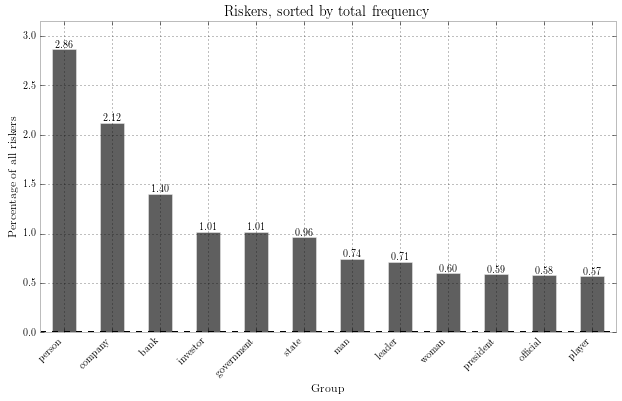

In [205]:
plotter('Riskers, sorted by total frequency', rskrs.results, kind = 'bar', black_and_white = True, style = 'bmh', figsize = (10, 6),
       num_to_plot = 12, y_label = 'Percentage of all riskers', show_totals = 'plot', save = 'riskers_total_final')


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 9 entries:
    politician
    candidate
    governor
    lawmaker
    person
    man
    woman
    child
    baby

Threshold: 19


***Done!***


14:38:27: images/rel_risker_final.png created.


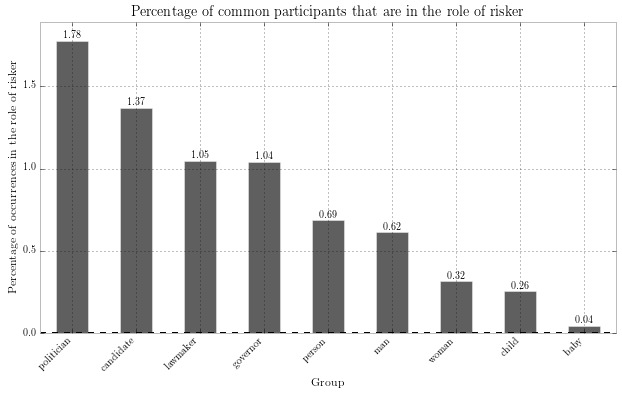

In [208]:
entities = ['politician', 'candidate', 'governor', 'lawmaker', 'person', 'man', 'woman', 'child', 'baby']
spec_riskers = editor(subj_of_risk_process.results, '%', noun_lemmata.results, 
                      just_entries = entities, skip_subcorpora = 1963, just_totals = True, sort_by = 'total')
plotter('Percentage of common participants that are in the role of risker', spec_riskers.results, 
        kind = 'bar', black_and_white = True, style = 'bmh', figsize = (10, 6), save = 'rel_risker_final',
       num_to_plot = 12, y_label = 'Percentage of occurrences in the role of risker', show_totals = 'plot')

In [2]:
propernouns = r['propernouns']

In [11]:
terms = ['vioxx', 'merck', 'aids', 'clinton', 'obama', 'europe', 'bush']
sel_nnp = editor(propernouns.results, '%', propernouns.totals, just_entries = terms, skip_subcorpora = 1963, sort_by = 'total')


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 7 entries:
    vioxx
    merck
    aids
    clinton
    obama
    europe
    bush

***Done!***




14:43:28: images/healthcomp.png created.


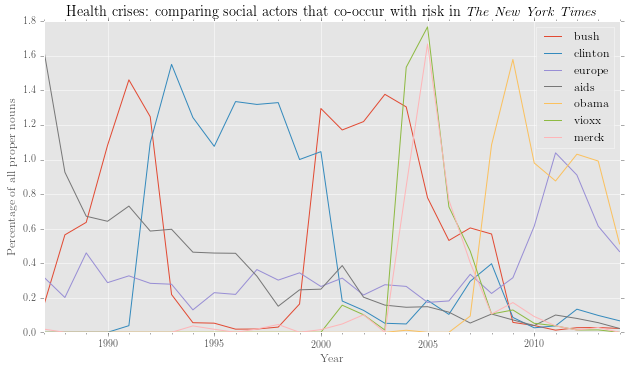

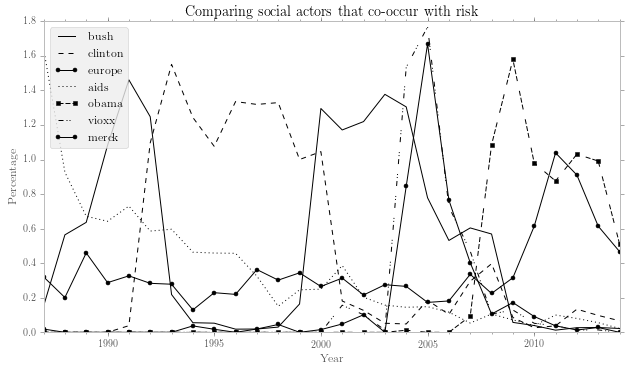

In [14]:
plotter('Health crises: comparing social actors that co-occur with risk in \emph{The New York Times}', sel_nnp.results, legend_pos = 'upper right',
       black_and_white = False, figsize = (10, 6), save = 'healthcomp', y_label = 'Percentage of all proper nouns')
plotter('Comparing social actors that co-occur with risk', sel_nnp.results, legend_pos = 'upper left',
       black_and_white = True, style = 'bmh', figsize = (10, 6))

In [72]:
propernouns.results.aids

1963     0
1987    87
1988    46
...
2012    12
2013     8
2014     2
Name: aids, Length: 29, dtype: int64

In [27]:
risk_of = r['risk_of']


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***


15:25:20: images/riskof_.png created.


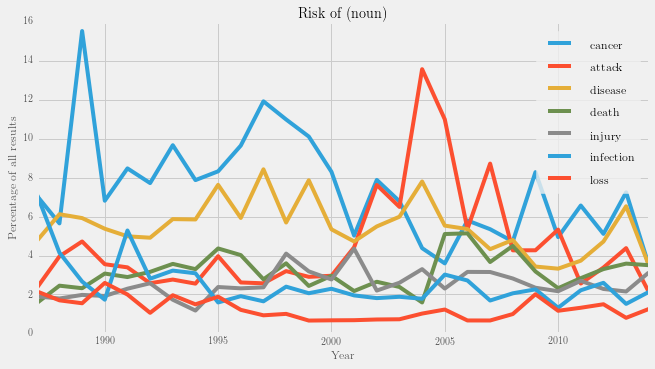

In [28]:
rel_riskof = editor(risk_of.results, '%', risk_of.totals, skip_subcorpora = 1963)
plotter('Risk of (noun)', rel_riskof.results, style = 'fivethirtyeight', 
        figsize = (10, 6), y_label = 'Percentage of all results', save = 'riskof_')

In [16]:
social_act = r['health-social-actors-w-risk-in-sent']

In [17]:
social_act.query

{'datatype': dtype('int64'),
 'dep_type': 'basic-dependencies',
 'dictionary': 'bnc.p',
 'function': 'interrogator',
 'function_filter': False,
 'lemmatag': False,
 'lemmatise': True,
 'option': 'words',
 'path': 'data/nyt/topics/health',
 'phrases': True,
 'plaintext': False,
 'query': 'NP <# (/NN.?/ !< /(?i).?\\brisk.?\\b/) >> (ROOT << /(?i).?\\brisk.?\\b/)',
 'quicksave': 'health-social-actors-w-risk-in-sent.p',
 'spelling': False,
 'table_size': 50,
 'time_ended': '2015-06=13 23:25:29',
 'time_started': '2015-06-13 23:22:05',
 'titlefilter': True,
 'translated_option': 't'}


***Processing results***

Keeping 6 entries:
    man
    woman
    person
    child
    consumer
    baby

***Done!***


14:53:58: images/everyday_health_final.png created.


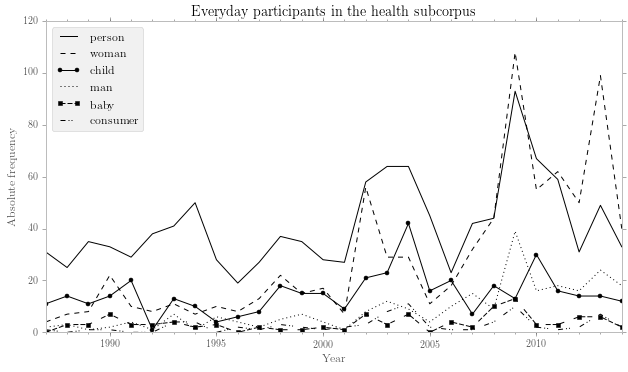

In [18]:
everyday = editor(social_act.results, just_entries = ['man', 'woman', 'person', 'child', 'consumer', 'baby'])
plotter('Everyday participants in the health subcorpus', everyday.results, 
        style = 'bmh', black_and_white=True, figsize = (10, 6), save = 'everyday_health_final')

In [19]:
inst = ['insurer', 'hospital', 'commercial insurer', 'business', 'insurance company', 
        'health maintenance organization', 'blue cross', 'disease control', 'employer']
institutional = editor(social_act.results, '%', social_act.totals, just_entries = inst)


***Processing results***

Keeping 9 entries:
    insurer
    hospital
    commercial insurer
    business
    insurance company
    health maintenance organization
    blue cross
    disease control
    employer

***Done!***



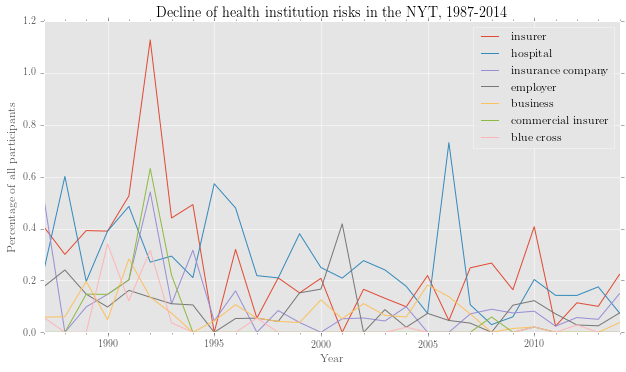

In [21]:
plotter('Decline of health institution risks in the NYT, 1987-2014', institutional.results, figsize = (10, 6),
        y_label = 'Percentage of all participants', black_and_white = False)

In [ ]:
#parts = load_result('health-part')
#peop = ['person', 'man', 'woman', 'child', 'baby', 'consumer']
#he_pa = editor(parts.results, just_entries = peop)
#plotter('Everyday participants in the health subcorpus', he_pa.results, 
    #y_label = 'Percentage of all participants',
       #figsize = (10, 6), black_and_white = True, style = 'bmh')

21:55:04: adj_modifiers.p loaded as adj_modifiers.
21:55:04: adj_riskwords.p loaded as adj_riskwords.
21:55:06: all_govs.p loaded as all_govs.
21:55:06: allwords.p loaded as allwords.
21:55:06: at_risk_things.p loaded as at_risk_things.
21:55:06: baseline.p loaded as baseline.
21:55:06: edited_adj_riskwords.p loaded as edited_adj_riskwords.
21:55:06: health-processes.p loaded as health-processes.
21:55:11: health-social-actors-w-risk-in-sent.p loaded as health-social-actors-w-risk-in-sent.
21:55:13: health_kwds.p loaded as health_kwds.
21:55:37: health_kwds_compared_to_nyt.p loaded as health_kwds_compared_to_nyt.
21:55:39: health_ngrams.p loaded as health_ngrams.
21:55:41: kwds.p loaded as kwds.
21:55:41: modals.p loaded as modals.
21:55:41: modals_lemmatised.p loaded as modals_lemmatised.
21:55:41: modifiers.p loaded as modifiers.
21:55:41: n_atrisk_n.p loaded as n_atrisk_n.
21:55:52: ngms.p loaded as ngms.
21:56:12: noun_lemmata.p loaded as noun_lemmata.
21:56:12: predicators.p loaded as predicators.
21:56:12: proc_w_risk_part.p loaded as proc_w_risk_part.
21:56:12: processes.p failed to load. Try using load_result to find out the matter.
21:56:24: propernouns.p loaded as propernouns.
21:56:24: relationals.p loaded as relationals.
21:56:24: risk_as_part_process_mod.p loaded as risk_as_part_process_mod.
21:56:24: risk_objects.p loaded as risk_objects.
21:56:24: risk_of.p loaded as risk_of.
21:56:25: risk_verbing.p loaded as risk_verbing.
21:56:25: riskpos.p loaded as riskpos.
21:56:25: riskwords.p loaded as riskwords.
21:56:26: sayers.p loaded as sayers.
21:56:26: social-actors-w-risk-in-sent.p loaded as social-actors-w-risk-in-sent.
21:56:26: subj_of_risk_process.p loaded as subj_of_risk_process.
21:56:26: terror_heart.p loaded as terror_heart.
21:56:27: uniques.p loaded as uniques.
21:56:27: x_subj_of_risk_process.p loaded as x_subj_of_risk_process.


***Processing results***

***Done!***


23:40:16: images/ngram_health_inc_final.png created.


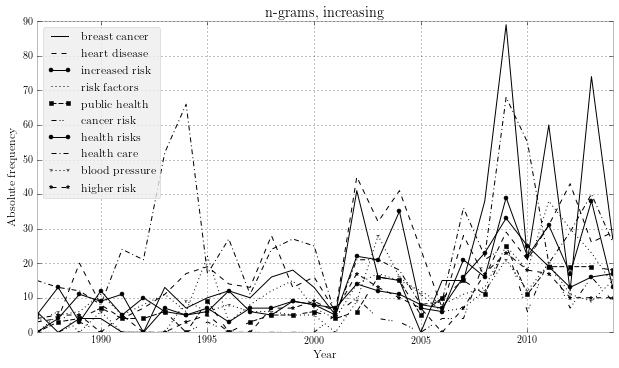

In [135]:
health_ngrams = r['health_ngrams']
inc = editor(health_ngrams.results, sort_by = 'increase')
plotter('n-grams, increasing', inc.results, num_to_plot=10, figsize = (10, 6), y_label = 'Absolute frequency',
        style = 'bmh', black_and_white = True, save = 'ngram_health_inc_final')

In [144]:
dec = editor(health_ngrams.results, sort_by = 'decrease')
dec = editor(dec.results, skip_entries = [8, 9, 10])


***Processing results***

***Done!***


***Processing results***

Skipping 3 entries:
    license makefile
    src stoplists
    dist inputdirectory

***Done!***




23:32:30: images/ngram_health_dec_final.png created.


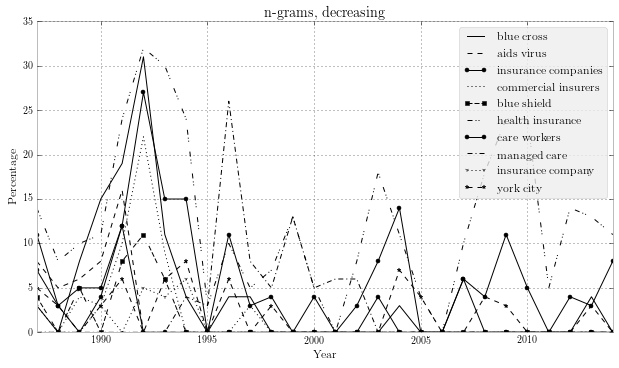

In [128]:
plotter('n-grams, decreasing', dec.results, num_to_plot=10, figsize = (10, 6),
        style = 'bmh', black_and_white = True, legend_pos = 'upper right', save = 'ngram_health_dec_final')

In [25]:
inc_part = editor(social_act.results, '%', social_act.totals, sort_by = 'increase')


***Processing results***

***Done!***




23:33:13: images/part_health_inc_final.png created.


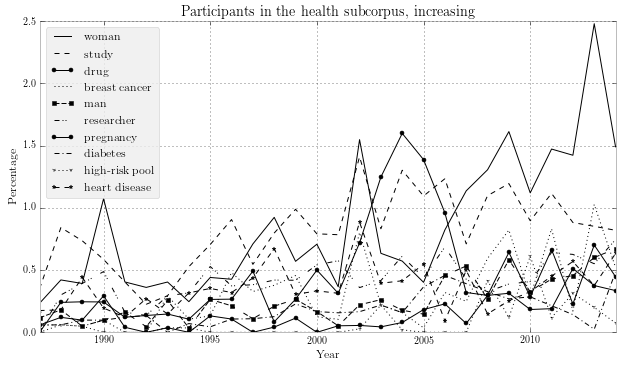

In [129]:
plotter('Participants in the health subcorpus, increasing', inc_part.results, num_to_plot=10, figsize = (10, 6),
        style = 'bmh', black_and_white = True, save = 'part_health_inc_final')

In [22]:
cats = [('Infectious disease', ['aids', 'aid', 'aids virus', 'aids patient', 'transmission', 'flu', 'influenza']),
('Life world', ['person', 'man', 'woman', 'child', 'baby', 'consumer']),
('Intitutions', ['empire', 'hospital', 'commercial', 'business', 'insurance company', 'HMO/health maintenance organisation', 'blue cross', 'disease control', 'employer', 'insurer', 'health insurance association', 'insurance industry', 'office']),
('Non-infectious disease', ['breast cancer', 'cancer', 'heart disease', 'diabetes', 'heart attack', 'prostate cancer', 'stroke', 'ovarian cancer', 'obesity']),
('Science and research',  ['study', 'researcher', 'finding', 'new study', 'author', 'university', 'expert'])]

In [23]:
themes = r['health-social-actors-w-risk-in-sent']
themes_all = r['health-social-actors-w-risk-in-sent']
for name, cat in cats:
    themes = editor(themes.results, merge_entries = cat, newname = name)
themes = editor(themes.results, '%', themes_all.totals, just_entries = [n for n, t in cats], sort_by = 'total')


***Processing results***

Merging 6 entries as "Infectious disease":
    aid
    aids virus
    aids patient
    transmission
    flu
    influenza

***Done!***


***Processing results***

Merging 6 entries as "Life world":
    person
    man
    woman
    child
    baby
    consumer

***Done!***


***Processing results***

Merging 12 entries as "Intitutions":
    empire
    hospital
    commercial
    business
    insurance company
    blue cross
    disease control
    employer
    insurer
    health insurance association
... and 2 more ... 

***Done!***


***Processing results***

Merging 9 entries as "Non-infectious disease":
    breast cancer
    cancer
    heart disease
    diabetes
    heart attack
    prostate cancer
    stroke
    ovarian cancer
    obesity

***Done!***


***Processing results***

Merging 7 entries as "Science and research":
    study
    researcher
    finding
    new study
    author
    university
    expert

***Done!***


***Processing results***

Keeping


15:06:03: images/themes-health.png created.


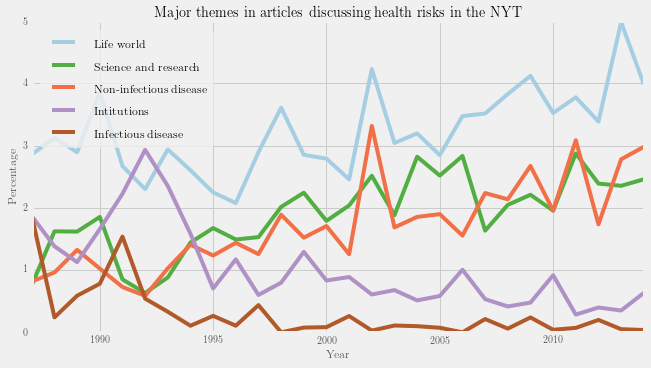

In [26]:
plotter('Major themes in articles discussing health risks in the NYT', themes.results, 
        num_to_plot=10, figsize = (10, 6), style = 'fivethirtyeight', save = 'themes-health')

## Accurate counts for experiential roles

### Three experiential roles

First, let's get the copula count:

In [119]:
#r = load_all_results()
deps = load_result('collapsed_deps')
copula = editor(deps.results, merge_entries = r'^cop:', newname = 'Cop').results['Cop']


***Processing results***

Merging 6 entries as "Cop":
    cop:be
    cop:seem
    cop:become
    cop:remain
    cop:appear
    cop:stay

***Done!***



Now, we can do a first pass over the data. Problem is, root includes Attribute/Value.

In [150]:
all_riskwords = load_result('coll_govs_with_pos')
#allwords = r['allwords']
govs = load_result('coll_govs_with_pos')
from collections import OrderedDict
exp_roles = OrderedDict({'Process': r'(?i)^(root:root|dobj:.*?:(run|take|pose)|prep_at:v[a-z]*:put)$',
            'Participant': r'(?i)^((xsubj|nsubj|nsubjpass|acomp|agent|appos|dobj|iobj):.*|prep_[a-z]*:v.*?:.*)$',
            'Modifier': r'(?i)^((advmod|vmod|amod|nn):.*$|(prep_[a-z]*:n))'})
#exp_roles = OrderedDict(sorted(exp_roles.items(), key=lambda t: t[0]), reverse)
for name, regex in exp_roles.items():
    govs = editor(govs.results, merge_entries = regex, newname = name)


***Processing results***

Merging 26 entries as "Process":
    root:root
    dobj:vb:take
    dobj:vbg:take
    prep_at:vb:put
    dobj:vb:pose
    dobj:vbd:take
    prep_at:vbg:put
    dobj:vbp:run
    dobj:vbz:pose
    dobj:vbz:run
... and 16 more ... 

***Done!***


***Processing results***

Merging 11081 entries as "Modifier":
    nn:nns:factor
    nn:nn:management
    nn:nn:factor
    amod:nns:investment
    amod:nn:business
    amod:nn:behavior
    prep_at:nns:people
    nn:nn:assessment
    prep_of:nn:level
    amod:nns:loan
... and 11071 more ... 

***Done!***


***Processing results***

Merging 16244 entries as "Participant":
    nsubj:vbz:be
    prep_at:vbp:be
    dobj:vb:reduce
    prep_at:vbz:be
    prep_at:vb:be
    prep_at:vbd:be
    nsubj:vbd:be
    dobj:vb:increase
    nsubj:vbp:be
    dobj:vbz:carry
... and 16234 more ... 

***Done!***



In [151]:
print govs.results['Process']
print govs.results['Participant']

1963     243
1987    1195
1988    1130
...
2012    1238
2013    1305
2014     840
Name: Process, Length: 29, dtype: int64
1963     606
1987    3379
1988    3265
...
2012    4546
2013    4432
2014    2791
Name: Participant, Length: 29, dtype: int64


Now we need to subtract copula results, and add to participant:

In [152]:
govs.results['Process'] = govs.results['Process'] - copula
govs.results['Participant'] = govs.results['Participant'] + copula

In [153]:
print govs.results['Process']
print govs.results['Participant']

1963    181
1987    830
1988    786
...
2012    931
2013    974
2014    661
Name: Process, Length: 29, dtype: int64
1963     668
1987    3744
1988    3609
...
2012    4853
2013    4763
2014    2970
Name: Participant, Length: 29, dtype: int64


And now get relative frequencies:

In [154]:
#allwd = interrogator('data/nyt/years', 'c', 'any')

In [155]:
all_riskwords = load_result('coll_govs_with_pos')

In [141]:
rel_govs = editor(govs.results, '%', all_riskwords.totals, 
              skip_subcorpora = 1963, sort_by = 'total', just_entries = exp_roles.keys())


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 3 entries:
    Process
    Modifier
    Participant

***Done!***



In [199]:
p_check = editor(govs.results, sort_by = 'increase', just_entries = exp_roles.keys(), 
                 keep_stats = True, skip_subcorpora = 1963)


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 3 entries:
    Process
    Modifier
    Participant

Process [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] [830, 786, 820, 818, 789, 744, 703, 677, 693, 682, 717, 843, 846, 941, 852, 930, 924, 900, 847, 848, 901, 1064, 1077, 1084, 1015, 931, 974, 661] 8.60946907499 0.00127794870432
Modifier [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] [1552, 1517, 1448, 1573, 1466, 1286, 1422, 1519, 1586, 1446, 1453, 1787, 1687, 1630, 1724, 2066, 1967, 1969, 2051, 1940, 1988, 2252, 2051, 2139, 2218, 2100, 1998, 1227] 24.9622331691 6.47585372162e-05
Participant [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] [3744, 3609, 3793, 3849, 3412, 3421, 3530, 3566, 3566, 3594, 3544, 3976, 3917, 4053, 4324, 5336, 5039, 5084, 5104, 5066, 4856, 5098, 4848, 5030, 5594, 4853, 4763, 2

In [201]:
p_check.results.ix['p']

Participant    0.000191
Modifier       0.000065
Process        0.001278
Name: p, dtype: float64

In [194]:
newnames = []
for col in list(p_check.results.columns):
    pval = p_check.results[col]['p']
    newname = '%s (p=%s)' % (col, format(pval, '.5f'))
    newnames.append(newname)
p_check.results.columns = newnames
statfields = ['slope', 'intercept', 'r', 'p', 'stderr']
p_check.results.drop(statfields, axis = 0, inplace = True)
p_check.results

,Participant (p=0.00019),Modifier (p=0.00006),Process (p=0.00128)
1987,3744,1552,830
1988,3609,1517,786
1989,3793,1448,820
1990,3849,1573,818
1991,3412,1466,789
...,...,...,...
2010,5030,2139,1084
2011,5594,2218,1015
2012,4853,2100,931
2013,4763,1998,974



***Processing results***

Skipping 0 subcorpora:
    

***Done!***


12:11:34: images/subplotthreerolesfinal.png created.


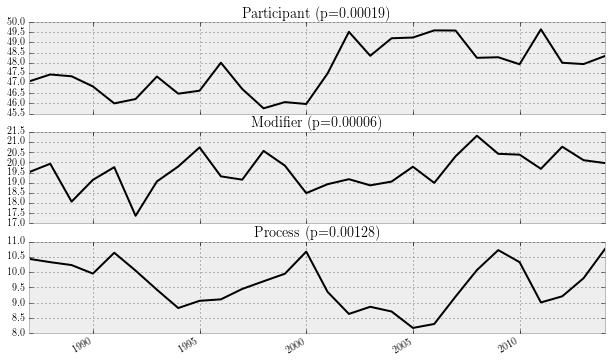

In [197]:
rel_govs = editor(p_check.results, '%', all_riskwords.totals, 
              skip_subcorpora = 1963, sort_by = 'total')
plotter('Experiential role of risk words', rel_govs.results, 
        y_label = 'Percentage of risk words in any experiential role',
    style = 'bmh', figsize = (10, 6), subplots = True, save = 'subplot-three-roles-final')


### Participant type

In [69]:
parts = load_result('coll_govs_with_pos')
parts = editor(parts.results, skip_entries = exp_roles['Process'])
parts = editor(parts.results, just_entries = exp_roles['Participant'])

# must remove processes
part_roles = {'Experiential subject': r'^(nsubj|agent|xsubj):',
              'Experiential object': r'^(nsubjpass|dobj|iobj|acomp):'}


for name, regex in part_roles.items():
    parts = editor(parts.results, merge_entries = regex, newname = name)


***Processing results***

Skipping 26 entries:
    root:root
    dobj:vb:take
    dobj:vbg:take
    prep_at:vb:put
    dobj:vb:pose
    dobj:vbd:take
    prep_at:vbg:put
    dobj:vbp:run
    dobj:vbz:pose
    dobj:vbz:run
... and 16 more ... 

***Done!***


***Processing results***

Keeping 16244 entries:
    nsubj:vbz:be
    prep_at:vbp:be
    dobj:vb:reduce
    prep_at:vbz:be
    prep_at:vb:be
    prep_at:vbd:be
    nsubj:vbd:be
    dobj:vb:increase
    nsubj:vbp:be
    dobj:vbz:carry
... and 16234 more ... 

***Done!***


***Processing results***

Merging 3671 entries as "Experiential subject":
    nsubj:vbz:be
    nsubj:vbd:be
    nsubj:vbp:be
    nsubj:jj:high
    nsubj:jj:great
    nsubj:jjr:greater
    nsubj:jj:low
    nsubj:jj:small
    nsubj:jjr:higher
    nsubj:jj:real
... and 3661 more ... 

***Done!***


***Processing results***

Merging 3931 entries as "Experiential object":
    dobj:vb:reduce
    dobj:vb:increase
    dobj:vbz:carry
    dobj:vbp:have
    dobj:vbz:increase

Add copula

In [70]:
parts.results['Experiential object'] = parts.results['Experiential object'] + copula

Finish up


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 2 entries:
    Experiential subject
    Experiential object

***Done!***



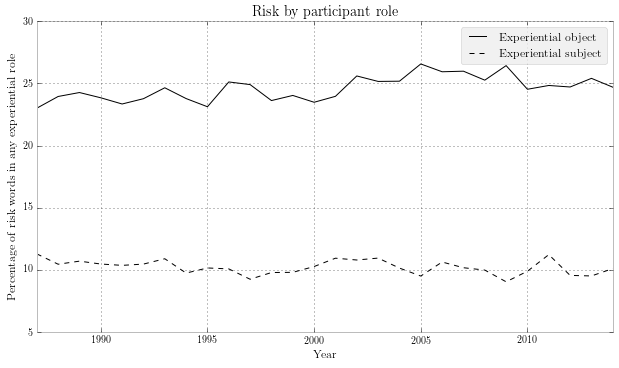

In [71]:
rel_parts = editor(parts.results, '%', all_riskwords.totals, just_entries = part_roles.keys(), 
                   sort_by = 'total', skip_subcorpora = 1963)

plotter('Risk by participant role', rel_parts.results, y_label = 'Percentage of risk words in any experiential role',
        style = 'bmh', figsize = (10, 6), black_and_white = True)

### Risk processes

In [57]:
procs = load_result('coll_govs_with_pos')
procs = editor(procs.results, just_entries = exp_roles['Process'], skip_subcorpora = 1963)
proc_roles = {'to risk': r'^root:root$',
              'to take risk': r'^dobj:v.*?:take$',
              'to run risk': r'^dobj:v.*?:run$',
              'to pose risk': r'^dobj:v.*?:pose$',
              'to put at risk': r'^prep_at:v.*?:put$'}
for name, regex in proc_roles.items():
    procs = editor(procs.results, merge_entries = regex, newname = name)


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 26 entries:
    root:root
    dobj:vb:take
    dobj:vbg:take
    prep_at:vb:put
    dobj:vb:pose
    dobj:vbd:take
    prep_at:vbg:put
    dobj:vbp:run
    dobj:vbz:pose
    dobj:vbz:run
... and 16 more ... 

***Done!***


***Processing results***

Merging 1 entries as "to risk":
    root:root

***Done!***


***Processing results***

Merging 6 entries as "to put at risk":
    prep_at:vb:put
    prep_at:vbg:put
    prep_at:vbd:put
    prep_at:vbn:put
    prep_at:vbz:put
    prep_at:vbp:put

***Done!***


***Processing results***

Merging 6 entries as "to take risk":
    dobj:vb:take
    dobj:vbg:take
    dobj:vbd:take
    dobj:vbp:take
    dobj:vbz:take
    dobj:vbn:take

***Done!***


***Processing results***

Merging 6 entries as "to run risk":
    dobj:vbp:run
    dobj:vbz:run
    dobj:vb:run
    dobj:vbg:run
    dobj:vbd:run
    dobj:vbn:run

***Done!***


***Processing results***

Merging 6 entries as "to pose risk

remove copula

In [58]:
procs.results['to risk'] = procs.results['to risk'] - copula


***Processing results***

Keeping 5 entries:
    to risk
    to put at risk
    to take risk
    to run risk
    to pose risk

***Done!***



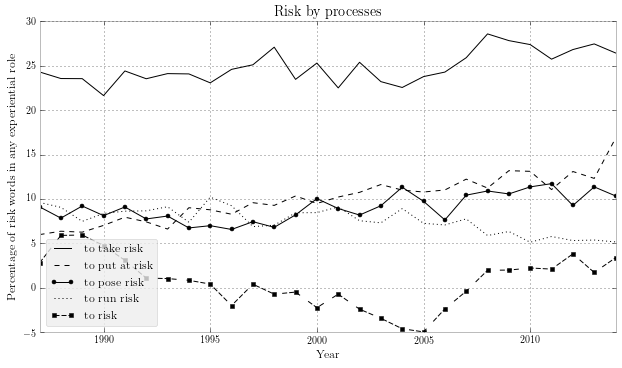

In [31]:
rel_procs = editor(procs.results, '%', all_riskwords.totals, just_entries = proc_roles.keys(), sort_by = 'total')
plotter('Risk by processes', rel_procs.results, y_label = 'Percentage of risk words in any experiential role',
        style = 'bmh', figsize = (10, 6), black_and_white = True)

### Risk as modifier

In [61]:
mods = load_result('coll_govs_with_pos')

mods = editor(mods.results, skip_entries = exp_roles['Process'])
mods = editor(mods.results, just_entries = exp_roles['Modifier'])

mod_roles = {'Nominal pre-head': r'^nn:',
              'Nominal post-head': r'^(prep_[a-z]*:n|vmod:)',
              'Head of PP complement': r'^prep_[a-z]*:v)',
              'Adverbial modifier': r'^advmod:',
              'Adjectival modifier': r'^amod:'}

for name, regex in mod_roles.items():
    mods = editor(mods.results, merge_entries = regex, newname = name)


***Processing results***

Skipping 26 entries:
    root:root
    dobj:vb:take
    dobj:vbg:take
    prep_at:vb:put
    dobj:vb:pose
    dobj:vbd:take
    prep_at:vbg:put
    dobj:vbp:run
    dobj:vbz:pose
    dobj:vbz:run
... and 16 more ... 

***Done!***


***Processing results***

Keeping 11081 entries:
    nn:nns:factor
    nn:nn:management
    nn:nn:factor
    amod:nns:investment
    amod:nn:business
    amod:nn:behavior
    prep_at:nns:people
    nn:nn:assessment
    prep_of:nn:level
    amod:nns:loan
... and 11071 more ... 

***Done!***


***Processing results***

Merging 0 entries as "Head of PP complement":
    

***Done!***


***Processing results***

Merging 6685 entries as "Nominal post-head":
    prep_at:nns:people
    prep_of:nn:level
    prep_of:nn:lot
    prep_in:nn:increase
    prep_of:nn:kind
    prep_of:nn:degree
    prep_at:nns:woman
    prep_at:nns:child
    prep_of:nn:amount
    prep_of:nn:assessment
... and 6675 more ... 

***Done!***


***Processing results***




***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 5 entries:
    Head of PP complement
    Nominal post-head
    Adjectival modifier
    Nominal pre-head
    Adverbial modifier

***Done!***



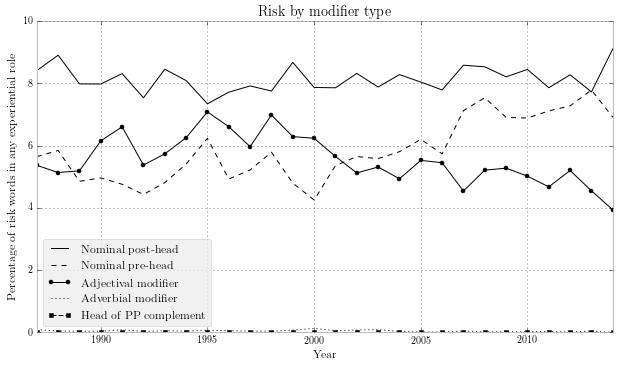

In [62]:
rel_mods = editor(mods.results, '%', all_riskwords.totals, just_entries = mod_roles.keys(), 
                  sort_by = 'total', skip_subcorpora = 1963)
plotter('Risk by modifier type', rel_mods.results, y_label = 'Percentage of risk words in any experiential role',
        style = 'bmh', figsize = (10, 6), black_and_white = True)

## Participant roles

In [147]:
deps = load_result('collapsed_deps')
quickview(deps, 10)
copula = editor(deps.results, merge_entries = r'^cop:', newname = 'Cop').results['Cop']

  0: root:say
  1: det:the
  2: root:be
  3: det:a
  4: root:have
  5: cop:be
  6: root:risk
  7: root:take
  8: aux:to
  9: root:make

***Processing results***

Merging 6 entries as "Cop":
    cop:be
    cop:seem
    cop:become
    cop:remain
    cop:appear
    cop:stay

***Done!***



In [144]:
govs = load_result('coll_govs_with_pos')
all_govs = load_result('coll_govs_with_pos')
material = load_result('coll_govs_with_pos')

In [145]:
exp_roles = {'Process': r'(?i)^(root:root|dobj:.*?:(run|take|pose)|prep_at:v[a-z]*:put|rcmod:.*|xcomp:.*)$',
             'Participant': r'(?i)^(xsubj|nsubj|nsubjpass|acomp|agent|appos|cop|dobj|iobj):.*$',
             'Modifier': r'(?i)^((advmod|vmod|amod|nn):.*$|(prep_[a-z]*:n|prep_[a-z]*:v))'}

exp_part_roles = {
    'Senser': r'(nsubj|xsubj|agent):v.*?:%s' % processes.mental,
    'Phenomenon': r'(iobj|dobj|nsubjpass|acomp):v.*?:%s' % processes.mental,
    'Token': r'(nsubj|xsubj|agent):v.*?:%s' % processes.relational,
    'Value': r'(iobj|dobj|nsubjpass|acomp):v.*?:%s' % processes.relational,
    'Sayer': r'(nsubj|xsubj|agent):v.*?:%s' % processes.verbal,
    'Verbiage': r'(iobj|dobj|nsubjpass|acomp):v.*?:%s' % processes.verbal}

govs = editor(govs.results, skip_entries = exp_roles['Process'])
material = editor(material.results, skip_entries = exp_roles['Process'])

# merge each participant role, and remove these entries from the material result
serieses = []
for name, regex in exp_part_roles.items():
    tmp = editor(govs.results, merge_entries = regex, newname = name)
    serieses.append(tmp.results[name])
    material = editor(material.results, skip_entries = regex)

# the leftover becomes material

material = editor(material.results, merge_entries = r'(nsubj|xsubj|agent):v.*?:', newname = 'Actor')
serieses.append(material.results['Actor'])
material = editor(material.results, merge_entries = r'(iobj|dobj|nsubjpass|acomp):v.*?:', newname = 'Goal, range')
serieses.append(material.results['Goal, range'])

# add copula




***Processing results***

Skipping 2829 entries:
    root:root
    dobj:vb:take
    dobj:vbg:take
    prep_at:vb:put
    dobj:vb:pose
    dobj:vbd:take
    prep_at:vbg:put
    dobj:vbp:run
    dobj:vbz:pose
    dobj:vbz:run
... and 2819 more ... 

***Done!***


***Processing results***

Skipping 2829 entries:
    root:root
    dobj:vb:take
    dobj:vbg:take
    prep_at:vb:put
    dobj:vb:pose
    dobj:vbd:take
    prep_at:vbg:put
    dobj:vbp:run
    dobj:vbz:pose
    dobj:vbz:run
... and 2819 more ... 

***Done!***


***Processing results***

Merging 187 entries as "Senser":
    nsubj:vbz:mean
    nsubj:vbn:see
    nsubj:vbp:need
    nsubj:vb:mean
    nsubj:vb:justify
    nsubj:vbn:find
    nsubj:vbd:find
    nsubj:vbz:estimate
    nsubj:vbz:need
    nsubj:vbd:acknowledge
... and 177 more ... 

***Done!***


***Processing results***

Skipping 187 entries:
    nsubj:vbz:mean
    nsubj:vbn:see
    nsubj:vbp:need
    nsubj:vb:mean
    nsubj:vb:justify
    nsubj:vbn:find
    nsubj:vbd:fi

In [89]:
df

,Senser,Phenomenon,Value,Token,Verbiage,Sayer,Actor,"Goal, range"
1963,3,74,74,3,17,52,41,184
1987,18,221,221,18,47,284,252,1192
1988,16,204,204,16,37,268,240,1236
1989,20,228,228,20,59,331,239,1321
1990,23,263,263,23,57,303,216,1236
...,...,...,...,...,...,...,...,...
2010,13,263,263,13,69,423,295,1898
2011,25,308,308,25,87,482,381,2033
2012,18,261,261,18,58,376,289,1870
2013,7,259,259,7,57,367,272,1871



***Processing results***

***Done!***


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***



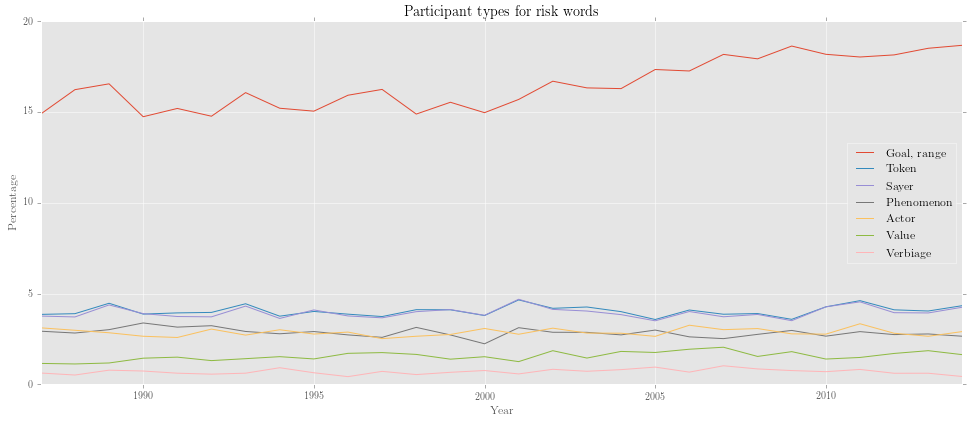

In [143]:
df = pd.concat(serieses, axis = 1)
tots = r['all_govs']
df = editor(df, '%', tots.totals, sort_by = 'total')
df = editor(df.results, skip_subcorpora = 1963)
plotter('Participant types for risk words', df.results, figsize = (16, 7))

In [ ]:
govs = load_result('coll_govs_with_pos')
all_govs = load_result('coll_govs_with_pos')
material = load_result('coll_govs_with_pos')

exp_roles = {'Process': r'(?i)^(root:root|dobj:.*?:(run|take|pose)|prep_at:v[a-z]*:put|rcmod:.*|xcomp:.*)$',
             'Participant': r'(?i)^(xsubj|nsubj|nsubjpass|acomp|agent|appos|cop|dobj|iobj):.*$',
             'Modifier': r'(?i)^((advmod|vmod|amod|nn):.*$|(prep_[a-z]*:n|prep_[a-z]*:v))'}

exp_kinds = {'Experiential subect': r'(nsubj|xsubj|agent):v', 
             'Experiential object': r'(iobj|dobj|nsubjpass|acomp):v'}

exp_part_roles = {
    'Senser': r'(nsubj|xsubj|agent):v.*?:%s' % processes.mental,
    'Phenomenon': r'(iobj|dobj|nsubjpass|acomp):v.*?:%s' % processes.mental,
    'Token': r'(nsubj|xsubj|agent):v.*?:%s' % processes.relational,
    'Value': r'(iobj|dobj|nsubjpass|acomp):v.*?:%s' % processes.relational,
    'Sayer': r'(nsubj|xsubj|agent):v.*?:%s' % processes.verbal,
    'Verbiage': r'(iobj|dobj|nsubjpass|acomp):v.*?:%s' % processes.verbal}

govs = editor(govs.results, skip_entries = exp_roles['Process'])
material = editor(material.results, skip_entries = exp_roles['Process'])

# merge each participant role, and remove these entries from the material result
serieses = []
for name, regex in exp_part_roles.items():
    tmp = editor(govs.results, merge_entries = regex, newname = name)
    serieses.append(tmp.results[name])
    material = editor(material.results, skip_entries = regex)

# the leftover becomes material

material = editor(material.results, merge_entries = r'(nsubj|xsubj|agent):v.*?:', newname = 'Actor')
serieses.append(material.results['Actor'])
material = editor(material.results, merge_entries = r'(iobj|dobj|nsubjpass|acomp):v.*?:', newname = 'Goal, range')
serieses.append(material.results['Goal, range'])